# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 9

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 40 баллов


<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 2 &mdash; 20 баллов
* Задача 3 &mdash; 35 баллов




-----

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### <font color="blue">Легкая часть</font>
## Задача 1


### 1. Загрузка данных и предобработка
#### **Профиль биология**

Загрузите [данные](https://www.kaggle.com/datasets/marshuu/breast-cancer) по предсказанию рака груди.

   

In [ ]:
data = pd.read_csv('breast_cancer.csv')
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


Проверьте, имеются ли в ваших данных пропуски. Если да, то удалите их.


In [ ]:
data.isna().sum()

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `Bare Nuclei` для разных классов:

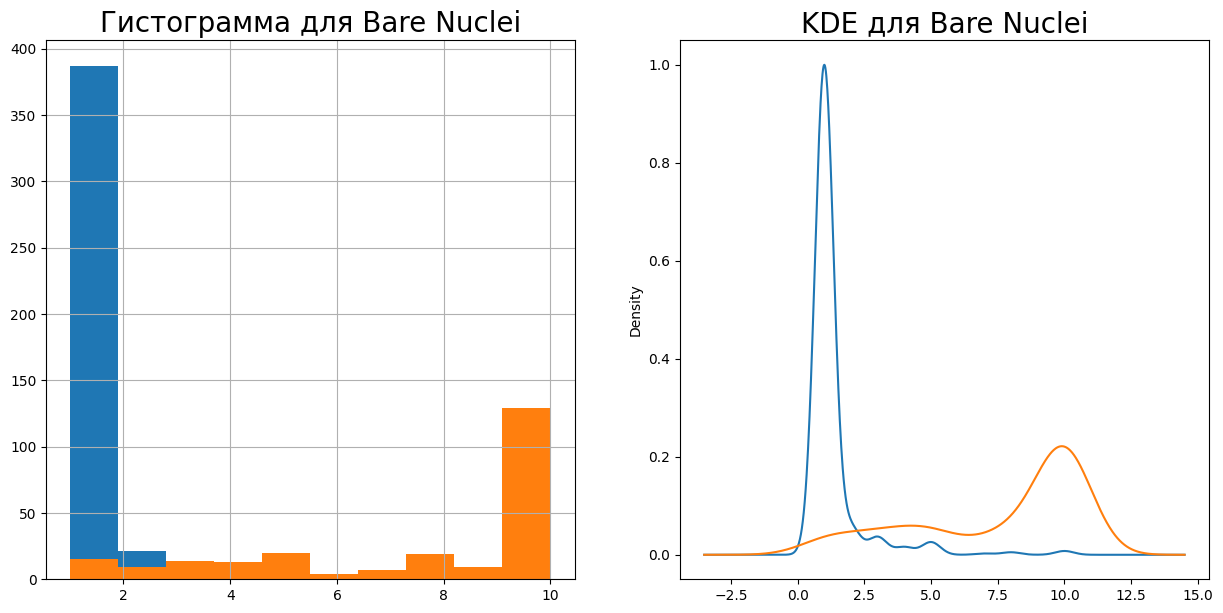

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("Class")['Bare Nuclei'].hist(ax=axs[0], )
data.groupby("Class")['Bare Nuclei'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для Bare Nuclei', fontsize=20)
axs[1].set_title('KDE для Bare Nuclei', fontsize=20);

Постройте гистограммы и ядерные оценки плотности для всех признаков из датасета отдельно для каждого класса.


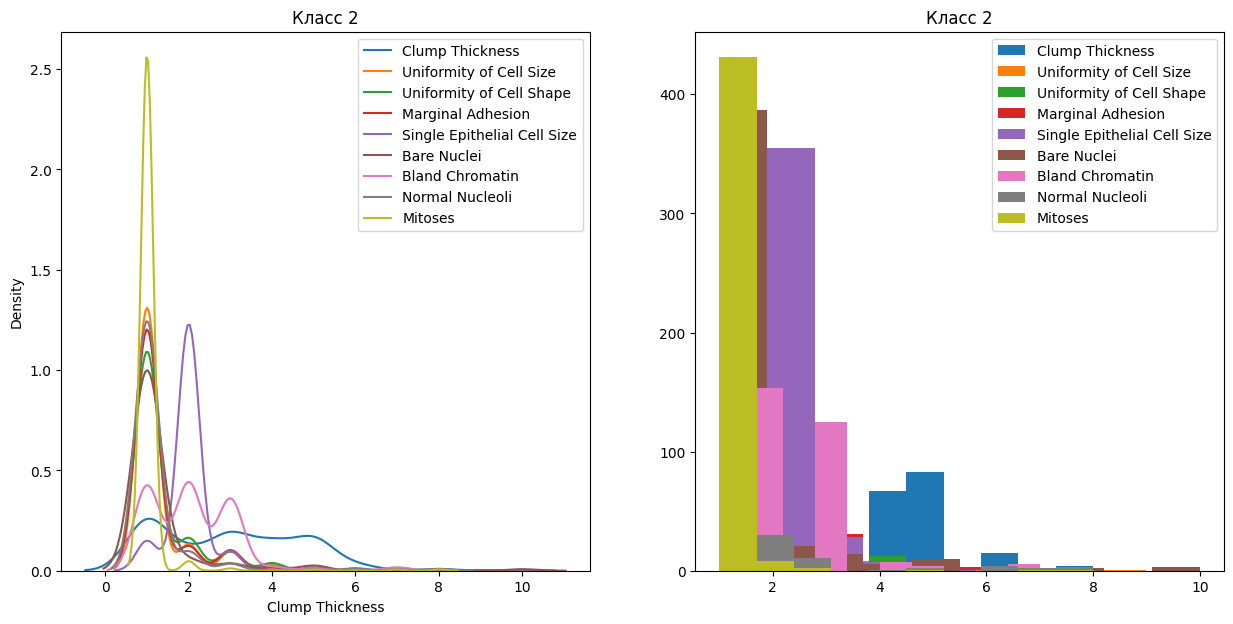

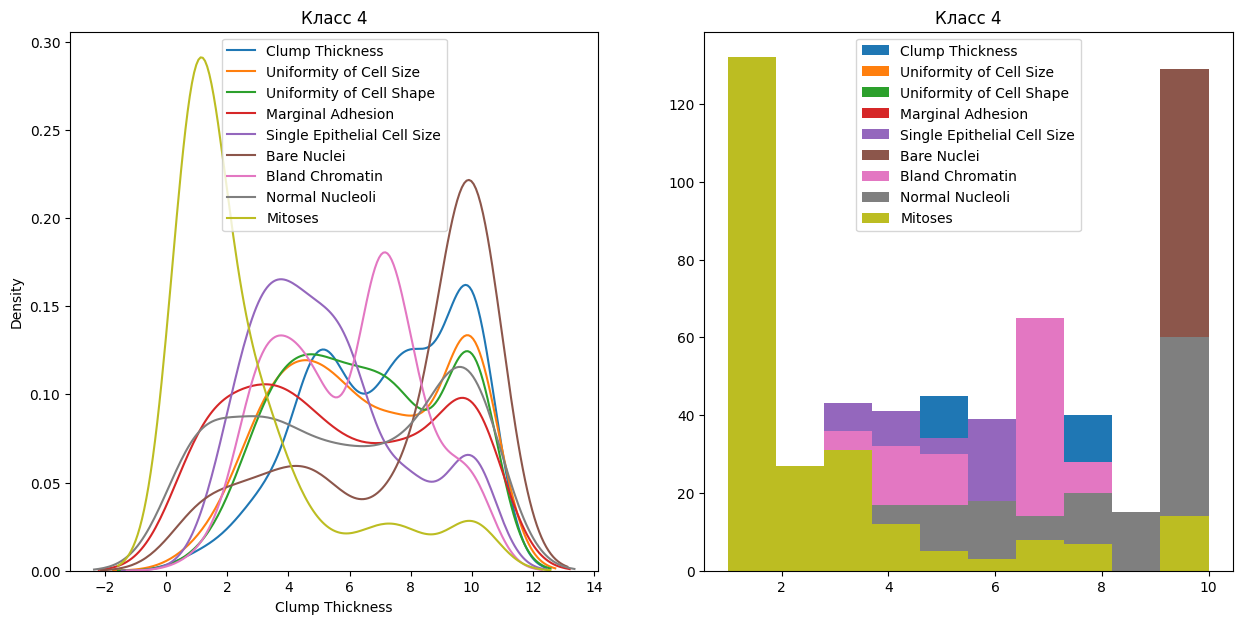

In [ ]:
needed_columns = ['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell Shape',
 'Marginal Adhesion',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']
y = data['Class']
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
for columns in needed_columns:
  axs[0].set_title('Класс 2')
  sns.kdeplot(data[f'{columns}'][y == 2], label = f'{columns}', ax=axs[0])
axs[0].legend()

for columns in needed_columns:
  axs[1].set_title('Класс 2')
  axs[1].hist(data[f'{columns}'][y == 2], label = f'{columns}')
axs[1].legend()


fig, axs = plt.subplots(1, 2, figsize=(15, 7))
for columns in needed_columns:
  axs[0].set_title('Класс 4')
  sns.kdeplot(data[f'{columns}'][y == 4], label = f'{columns}', ax=axs[0])
axs[0].legend()

for columns in needed_columns:
  axs[1].set_title('Класс 4')
  axs[1].hist(data[f'{columns}'][y == 4], label = f'{columns}')
axs[1].legend();

Какие выводы вы можете сделать из полученный графиков?

**Вывод:** Можно сделать вывод, что 2 и 4 классы больше всего различаются в 'Bare Nuclei', также заметны различия в 'Bland Chromatin', 'Clump Thickness', 'Uniformity of Cell Size'. В целом скорее всего класс 4 является подозрительным на рак, тк имеются большие различия, скорее всего мутации и злокачественные изменения.

#### **Профиль физика**
Загрузите [данные](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code) по бинарной классификации астероидов в зависимости от различных параметров. 

Вашей целевой переменной будет являться столбец `pha`. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [ ]:
data = <...>
data.head()

Удалим ненужные колонки и колонки с категориальными данными, потому что мы пока не умеем с ними работать. 

In [ ]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id', 
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

In [ ]:
<...>

Библиотека `pandas` позволяет строить графики `matplotlib` для своих объектов `DataFrame` ([подробнее](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)). Посмотрим, как распределены значения признака `H` для разных классов:

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
data.groupby("pha")['H'].hist(ax=axs[0], alpha=0.5)
data.groupby("pha")['H'].plot(kind='kde', ax=axs[1])
axs[0].set_title('Гистограмма для H', fontsize=20)
axs[1].set_title('KDE для H', fontsize=20);

Какой из графиков качественнее отображает информацию о данных? С чем это связано?

**Ответ:** <...>

Постройте гистограммы и ядерные оценки плотности для признаков из списка features отдельно для каждого класса.

In [ ]:
features = ['epoch', 'e', 'ma', 'n', 'tp', 'rms']

<...>

Какие выводы вы можете сделать из полученный графиков?

**Вывод:**<...>

### 2. Обучение модели

Продолжайте использовать выбранные вами данные.

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.

In [ ]:
X = data[needed_columns]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

Отмасштабируйте свои признаки.

In [ ]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()
X_train_stand = object.fit_transform(X_train)
X_test_stand = object.transform(X_test)

Обучите модель логистической регрессии.

In [ ]:
clf = LogisticRegression(random_state=42, fit_intercept = True)
clf.fit(X_train_stand, y_train)

LogisticRegression(random_state=42)

In [ ]:
clf.coef_

array([[1.18565367, 0.18586999, 0.70737719, 0.59957322, 0.02328032,
        1.5127378 , 1.03450985, 0.52025279, 0.74539393]])

Сделайте предсказание для тестовой выборки и оцените качества полученного предсказания.

In [ ]:
predicted = clf.predict(X_test_stand)
accuracy = accuracy_score(y_test, predicted)
print(accuracy)

0.9560975609756097


**Вывод:** По коэффициентам полученной модели видно, что предположения о самых показательных признаках оправдались, кроме признака Uniformity of cell, скорее всего так получилось из-за отсутсвия масштабирования на первоначальных данных. Accuracy получилось низким, что может говорить, не о том, что много точек было отнесено не к тому классу, которым на самом деле является, а что классы являются неравными, те класс 2 почти в два раза больше класса 4. Accuracy плохо работает на таких.



### <font color="orange">Сложная часть</font>


## Задача 2

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также успользуют в решениях задач классификации.

Пусть дана выборка $(x_1, Y_1), ..., (x_n, Y_n)$, где $x_i = (x_{i1}, ..., x_{id}) \in \mathscr{X}$ и случайный класс $Y_i \sim Bern\left(\sigma (\theta^T x_i)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$L_Y (\theta)= \prod\limits_{i=1}^n \sigma (\theta^T x_i)^{Y_i} \left(1 - \sigma (\theta^T x_i)\right)^{1-Y_i}$$

$$\ell_Y(\theta) = \log L_Y(\theta)$$

$$\ell_Y(\theta) \longrightarrow \max_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$\ell_Y(\theta) - \lambda \|\theta\|^2\longrightarrow \max_\theta.$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию **Ridge-регуляризацией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике.

**1.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для 
- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

 Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**2.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для модели с ridge-регуляризацией необходима стандартизация. Почему? Можно представить, что признаки имеют некоторые различные единицы измерения.

## Задача 3

В этой задаче вам предстоит реализовать стохастический градиентный спуск, используйте данные из первого задания.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [ ]:
theta0 = [0, 0, 0, 0, 0, 0, 0, 0, 0]
def sigmoid(self, z):
    return 1 / (1 + np.exp(-z))

Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.

In [ ]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegressionSGD():

    def __init__(self, lr=0.001, n_iters=1000, batch_size = 128):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.batch_size = batch_size

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            batch_indices = np.random.choice(n_samples, self.batch_size, replace=False)
            X_batch = X[batch_indices]
            y_batch = y[batch_indices]
            nb_samples, n_features = X_batch.shape
            linear_pred = np.dot(X_batch, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/nb_samples) * np.dot(X_batch.T, (predictions - y_batch))
            db = (1/nb_samples) * np.sum(predictions-y_batch)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred

Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [ ]:
def accuracy(y_pred, y_test):
  return np.sum(y_pred==y_test)/len(y_test)

Посчитайте ошибку на тестовой выборке.

Сделайте выводы.